In [ ]:
### missing values

In [97]:
###importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
data=pd.read_csv('/content/diamonds_new.csv')
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [6]:
data.head() #first 5 lines

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [7]:
data.tail() #last 5 lines

,carat,cut,color,clarity,table,x,y,z,price_new
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5
53939,0.75,Ideal,D,SI2,55.0,5.83,5.87,3.64,1378.5


In [8]:
data.shape

(53940, 9)

In [9]:
##the dataset has 53940 rows and 9 columns

In [10]:
data.info()  ###gives the information about the columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [11]:
data.isna().sum()  ###to check the missing values present in the given data

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [ ]:
###the columns carat,color and clarity has 99,56 and 63 missing values respectively

In [ ]:
###FILLING MISSING VALUES

In [12]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [13]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

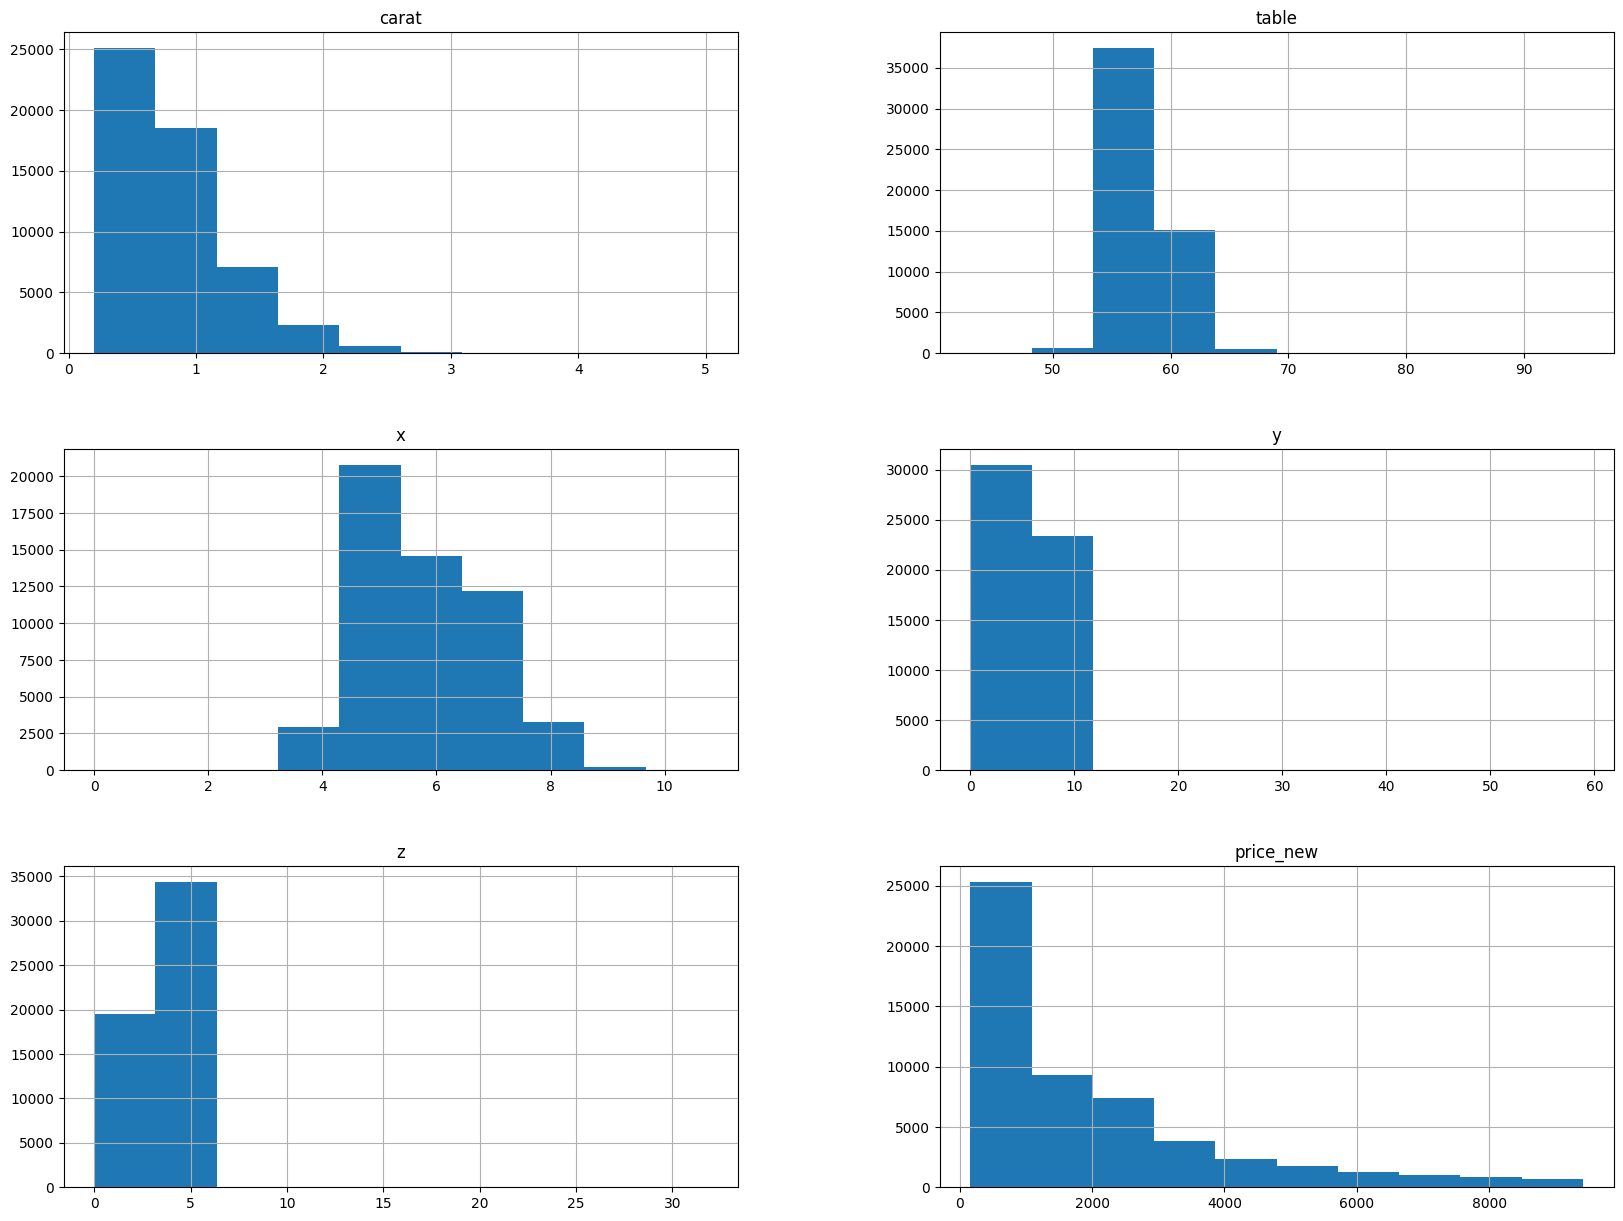

In [14]:
fraqgraph=data.select_dtypes(include=['float']) ###to check skewness
fraqgraph.hist(figsize=(20,15))
plt.show()

In [15]:
##we'll fill the missing values of columns carat and table with its median
for i in ['carat','table']:
    data[i]=data[i].fillna(data[i].median())

In [16]:
data.isna().sum()

carat         0
cut           0
color        56
clarity       0
table         0
x             0
y             0
z             0
price_new     0
dtype: int64

In [ ]:
##the carat and table values have no missing values
##now we'll fill missing value of clarity

In [17]:
data['clarity'] = data['clarity'].fillna(data['clarity'].mode()[0])
data['clarity'].isna().sum()

0

In [31]:
###OUTLIERS
##detection of outliers using boxplots

Text(0.5, 1.0, 'boxplot of carat')

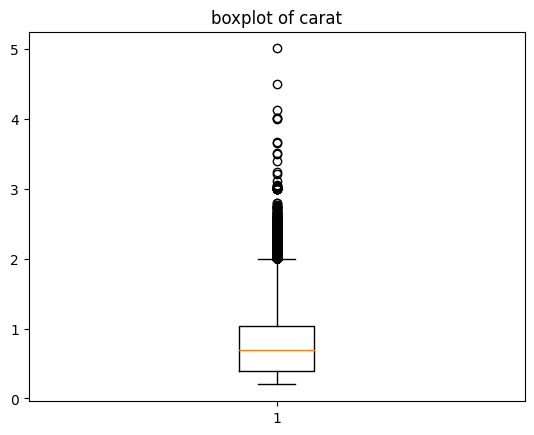

In [18]:
plt.boxplot(data['carat'])
plt.title("boxplot of carat")

Text(0.5, 1.0, 'boxplot of table ')

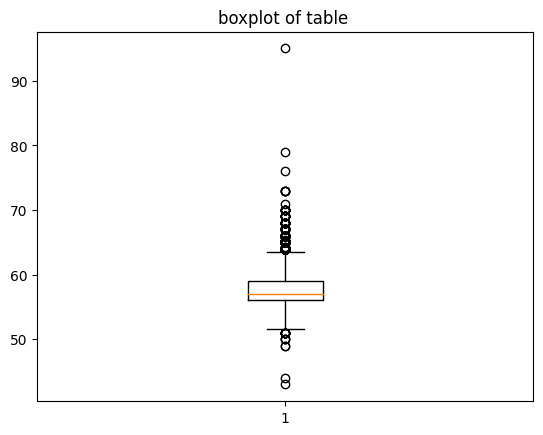

In [58]:
plt.boxplot(data['table'])
plt.title("boxplot of table ")

Text(0.5, 1.0, 'boxplot of x')

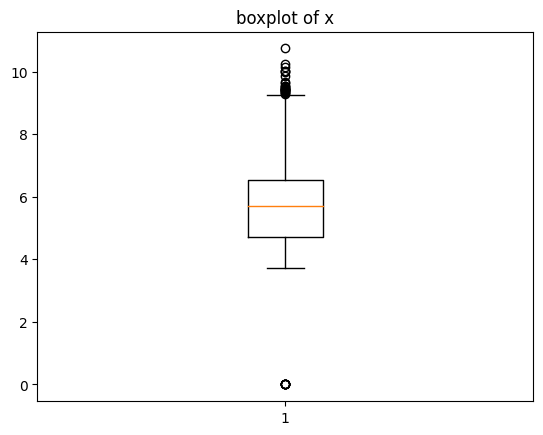

In [59]:
plt.boxplot(data['x'])
plt.title("boxplot of x")

Text(0.5, 1.0, 'boxplot of y ')

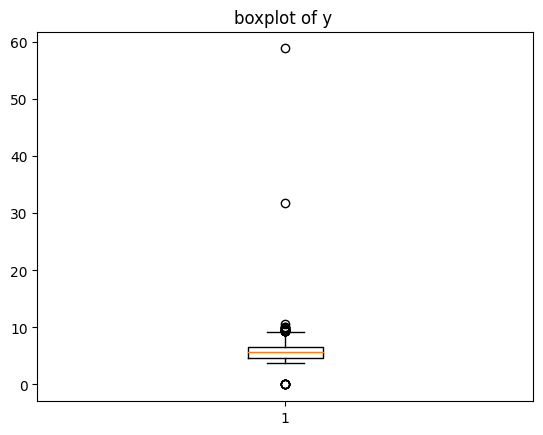

In [60]:
plt.boxplot(data['y'])
plt.title("boxplot of y ")

Text(0.5, 1.0, 'price_new ')

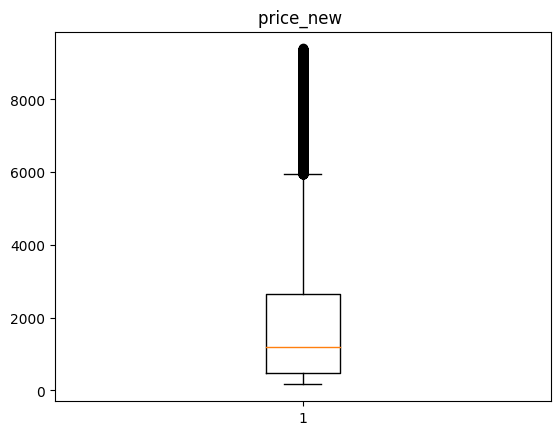

In [61]:
plt.boxplot(data['price_new'])
plt.title("price_new ")

In [62]:
####ENCODING


In [63]:
##one hot encoding

In [99]:
data.cut.nunique()

5

In [126]:
data_one=pd.get_dummies(data)

In [127]:
data_one.head()

,carat,table,x,y,z,price_new,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,3.95,3.98,2.43,163.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,3.89,3.84,2.31,163.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,65.0,4.05,4.07,2.31,163.5,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,4.20,4.23,2.63,167.0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,4.34,4.35,2.75,167.5,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [82]:
##SCALING

In [83]:
##standard scaling

In [105]:
data_one.describe()

,carat,table,x,y,z,price_new,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861,0.029848,0.090953,0.399537,0.255673,...,0.100519,0.052058,0.013737,0.033185,0.242214,0.170449,0.151483,0.227253,0.067760,0.093919
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869,0.170169,0.287545,0.489808,0.436243,...,0.300694,0.222146,0.116400,0.179121,0.428427,0.376030,0.358522,0.419061,0.251337,0.291719
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
type(data_one)

pandas.core.frame.DataFrame

In [111]:
from sklearn import preprocessing


In [113]:
standardisation=preprocessing.StandardScaler() #take the instance of standard scaling to a variable standardisation
data_one=standardisation.fit_transform(data_one)#apply transforming values to data_one

In [115]:
data_one=pd.DataFrame(data_one)

In [116]:
data_one.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,5.384100e+04,5.387700e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,...,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,3.378447e-16,7.158576e-16,2.782103e-16,-8.430615e-17,-1.264592e-17,-9.273676e-17,-7.376788e-18,-1.053827e-17,-3.056098e-17,2.107654e-17,...,1.686123e-17,-2.423802e-17,2.213036e-17,-3.583011e-17,-1.053827e-17,7.376788e-18,-1.896888e-17,-4.215307e-18,-3.214172e-17,4.215307e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.260729e+00,-6.466691e+00,-5.109120e+00,-5.020931e+00,-5.028871e+00,-9.040952e-01,-1.754032e-01,-3.163116e-01,-8.157084e-01,-5.860849e-01,...,-3.342938e-01,-2.343431e-01,-1.180205e-01,-1.852676e-01,-5.653610e-01,-4.532890e-01,-4.225245e-01,-5.422949e-01,-2.696028e-01,-3.219539e-01
25%,-8.391649e-01,-6.520127e-01,-9.103248e-01,-8.882800e-01,-8.945421e-01,-7.476808e-01,-1.754032e-01,-3.163116e-01,-8.157084e-01,-5.860849e-01,...,-3.342938e-01,-2.343431e-01,-1.180205e-01,-1.852676e-01,-5.653610e-01,-4.532890e-01,-4.225245e-01,-5.422949e-01,-2.696028e-01,-3.219539e-01
50%,-2.068189e-01,-2.047297e-01,-2.777553e-02,-2.147398e-02,-1.368844e-02,-3.839672e-01,-1.754032e-01,-3.163116e-01,-8.157084e-01,-5.860849e-01,...,-3.342938e-01,-2.343431e-01,-1.180205e-01,-1.852676e-01,-5.653610e-01,-4.532890e-01,-4.225245e-01,-5.422949e-01,-2.696028e-01,-3.219539e-01
75%,5.098398e-01,6.898362e-01,7.210542e-01,7.052421e-01,7.108847e-01,3.487866e-01,-1.754032e-01,-3.163116e-01,1.225928e+00,1.706238e+00,...,-3.342938e-01,-2.343431e-01,-1.180205e-01,-1.852676e-01,-5.653610e-01,-4.532890e-01,-4.225245e-01,-5.422949e-01,-2.696028e-01,-3.219539e-01
max,8.877885e+00,1.679202e+01,4.465203e+00,4.654965e+01,4.015040e+01,3.732438e+00,5.701149e+00,3.161440e+00,1.225928e+00,1.706238e+00,...,2.991381e+00,4.267248e+00,8.473106e+00,5.397599e+00,1.768781e+00,2.206098e+00,2.366727e+00,1.844015e+00,3.709160e+00,3.106035e+00
